In [0]:
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
np.warnings.filterwarnings('ignore')

# Load Features

In [182]:
import numpy as np
X=np.load('data_0.1-30Hz.npy')
y=np.load('labels_0.1-30Hz.npy')
X.shape,y.shape

((72, 396), (72,))

# Feature Selection

In [0]:
feature_list=['mean','std','ptp','var','minim','maxim','mean_square','rms','abs_diffs_signal','skewness','kurtosis','zero_crossing',
'app_epy','perm_epy','svd_epy','spectral_epy','sample_epy','katz','higuchi','petrosian','hjorth_mobility','hjorth_complexity']

In [0]:
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="rbf"),
    DecisionTreeClassifier(),
    LogisticRegression()]


In [0]:
clf_feature_selected=[]
for clfs in classifiers:
  feature_selected=[]
  for i in range(36):
    clf=LogisticRegression()
    randomize = np.arange(len(X))
    np.random.shuffle(randomize)
    X = X[randomize]
    y = y[randomize]
    for i,j in zip(range(0,396,18),feature_list):
      X_new=X[:,i:i+18]
      X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size=0.2, random_state=42,stratify=y)
      sc=StandardScaler()
      X_train=sc.fit_transform(X_train)
      X_test=sc.transform(X_test)
      
      clf.fit(X_train,y_train)
      y_pred = clf.predict(X_test)  
      acc=metrics.accuracy_score(y_test, y_pred)
      #print("Accuracy of ",j,metrics.accuracy_score(y_test, y_pred))
      if acc>0.70:
        feature_selected.append(j)
  clf_feature_selected.append(feature_selected)        
 # print('-------------------------------------------------------------------')


In [188]:
from collections import Counter
clf_count=[]
for i in range(4):
  feature_selected=clf_feature_selected[i]
  count= {x:feature_selected.count(x) for x in feature_selected}
  c = Counter(count)
  #print(c.most_common())
  clf_count.append(c.most_common(10))
  print(c.most_common(10))

[('ptp', 26), ('maxim', 24), ('minim', 22), ('std', 20), ('rms', 19), ('var', 17), ('mean_square', 17), ('petrosian', 13), ('higuchi', 12), ('perm_epy', 10)]
[('ptp', 22), ('maxim', 21), ('minim', 15), ('mean_square', 15), ('higuchi', 14), ('petrosian', 14), ('var', 13), ('perm_epy', 13), ('std', 10), ('rms', 10)]
[('maxim', 20), ('ptp', 19), ('var', 16), ('minim', 16), ('mean_square', 15), ('std', 10), ('rms', 10), ('higuchi', 9), ('abs_diffs_signal', 7), ('perm_epy', 7)]
[('maxim', 21), ('ptp', 20), ('var', 15), ('mean_square', 15), ('rms', 14), ('minim', 13), ('std', 12), ('perm_epy', 10), ('kurtosis', 9), ('petrosian', 9)]


In [165]:
# count= {x:feature_selected.count(x) for x in feature_selected}
# from collections import Counter
# c = Counter(count)
# print(c.most_common())
# print(c.most_common(7))

[('maxim', 21), ('ptp', 20), ('mean_square', 18), ('std', 17), ('var', 17), ('rms', 16), ('minim', 13), ('perm_epy', 11), ('petrosian', 10), ('abs_diffs_signal', 8), ('kurtosis', 5), ('hjorth_complexity', 5), ('katz', 4), ('spectral_epy', 4), ('skewness', 3), ('higuchi', 3), ('sample_epy', 3), ('hjorth_mobility', 3), ('app_epy', 2), ('svd_epy', 2), ('mean', 1), ('zero_crossing', 1)]
[('maxim', 21), ('ptp', 20), ('mean_square', 18), ('std', 17), ('var', 17), ('rms', 16), ('minim', 13)]


In [0]:
good_feature=[]
for i in range(4):
  #print(clf_count[i])
  x=clf_count[i]
  for j in range(10):
    good_feature.append((x[j][0]))


In [195]:
count= {x:good_feature.count(x) for x in good_feature}
c = Counter(count)
c.most_common()
good_feature=[]
for i in range(8):
  good_feature.append(c.most_common(8)[i][0])
print(good_feature)  

['ptp', 'maxim', 'minim', 'std', 'rms', 'var', 'mean_square', 'perm_epy']


12

In [166]:
# good_feature=[]
# for i in range(9):
#   good_feature.append(c.most_common(9)[i][0])
# print(good_feature)  

['maxim', 'ptp', 'mean_square', 'std', 'var', 'rms', 'minim', 'perm_epy', 'petrosian']


In [0]:
# bad_feature=set(feature_list)-set(good_feature)
# print(bad_feature)

In [0]:
# #delete bad features

# for key,val in zip(feature_list,range(0,396,18)):
#   for fe in bad_feature:
#     if key==fe:      
#         X=np.delete(X,np.s_[val:val+18],axis=1)


In [196]:
#keep good features only
X_good=[]
for key,val in zip(feature_list,range(0,396,18)):
  for fe in good_feature:
    if key==fe:     
      print('key',key,'value',val,":",val+18) 
      X_good.append(X[:,val:val+18])


key std value 18 : 36
key ptp value 36 : 54
key var value 54 : 72
key minim value 72 : 90
key maxim value 90 : 108
key mean_square value 108 : 126
key rms value 126 : 144
key perm_epy value 234 : 252


In [0]:
X=np.concatenate((X_good),axis=1)

# Classification

In [0]:
#%% split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)

In [0]:
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [200]:
from sklearn.svm import SVC
clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.86      0.86      0.86         7

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15

accuracy is  0.8666666666666667


# Fine Tuning

In [201]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clf = SVC(kernel="rbf")
Cs = [ 1,2,3,5,7,10,15,30,50,70,100]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7339285714285715


{'classifier__C': 1, 'classifier__gamma': 0.001}

### KNN

In [202]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

n_neighbors  = [ 3,4,5,6,7,8,9]
weights  = ['uniform','distance']
metric=['minkowski','manhattan','euclidean']
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__n_neighbors=n_neighbors,classifier__weights=weights,classifier__metric=metric),cv=5,n_jobs=-1,iid=False) 
results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_


0.7357142857142858


{'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 8,
 'classifier__weights': 'uniform'}

### nu

In [203]:
from sklearn.svm import SVC, LinearSVC, NuSVC

clf = NuSVC(kernel="rbf")
nu = [0.1,0.3,0.5,0.7,1]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__nu=nu,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7214285714285715


{'classifier__gamma': 0.001, 'classifier__nu': 0.7}

### lR

In [204]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
C = [ 1,2,3,5,7,10,15,30,50,70,100]
penalty=["l1","l2"]
pipe = Pipeline(steps=[('scaler', sc), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(classifier__C=C,classifier__penalty=penalty),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.6982142857142858


{'classifier__C': 3, 'classifier__penalty': 'l1'}

# Cross Validation

In [0]:

from sklearn.preprocessing import StandardScaler,MaxAbsScaler

scalar=StandardScaler()

In [0]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [0]:
classifiers = [
    KNeighborsClassifier(n_neighbors=8,weights='distance',metric='manhattan'),
    SVC(kernel="rbf",C=1,gamma=0.001),
    NuSVC(nu=0.7,gamma=0.001),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(C=1,penalty='l1')]


In [0]:
pipeline = Pipeline([('transformer', scalar),('estimator', clf)])

In [154]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy=[]
accuracy_std=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())

KNeighborsClassifier
****Results****
Accuracy: 60.8929%
SVC
****Results****
Accuracy: 73.5714%
NuSVC
****Results****
Accuracy: 75.0000%
DecisionTreeClassifier
****Results****
Accuracy: 61.7857%
RandomForestClassifier
****Results****
Accuracy: 55.3571%
AdaBoostClassifier
****Results****
Accuracy: 62.5000%
GradientBoostingClassifier
****Results****
Accuracy: 58.7500%
GaussianNB
****Results****
Accuracy: 72.5000%
LinearDiscriminantAnalysis
****Results****
Accuracy: 52.6786%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 43.7500%
LogisticRegression
****Results****
Accuracy: 72.1429%


Text(0.5, 1.0, 'Classifiers')

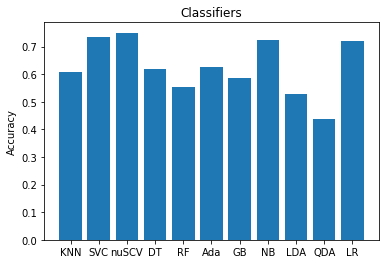

In [155]:
import matplotlib.pyplot as plt
classifier=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy')
plt.title('Classifiers')

# Principle Component Analysis

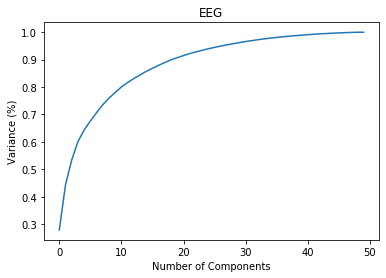

In [156]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import cross_val_score

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('EEG')
plt.show()

In [0]:

clf = SVC(kernel='rbf')
pca = PCA(n_components=10)

pipeline = Pipeline([('transformer', scalar),('selector',pca), ('estimator', clf)])


In [158]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_pca=[]
std_pca=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_pca.append(np.array(scores).mean())
    std_pca.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 70.5357%
SVC
****Results****
Accuracy: 73.5714%
NuSVC
****Results****
Accuracy: 73.5714%
DecisionTreeClassifier
****Results****
Accuracy: 65.3571%
RandomForestClassifier
****Results****
Accuracy: 63.3929%
AdaBoostClassifier
****Results****
Accuracy: 64.2857%
GradientBoostingClassifier
****Results****
Accuracy: 61.2500%
GaussianNB
****Results****
Accuracy: 68.3929%
LinearDiscriminantAnalysis
****Results****
Accuracy: 69.4643%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 58.2143%
LogisticRegression
****Results****
Accuracy: 64.1071%


In [161]:
from sklearn.model_selection import GridSearchCV

clf = SVC(kernel="rbf")
n_components = [5,10,15,20]
Cs = [0.0001,0.001,0.1, 1,2,3,5,7,10,15,30]
gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
pipe = Pipeline(steps=[('scalar',sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                              classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7767857142857143


{'classifier__C': 2, 'classifier__gamma': 0.001, 'selector__n_components': 20}

In [160]:
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()
C = [ 1,2,3,5,7,10,15,30,50,70,100]
penalty=["l1","l2"]
pipe = Pipeline(steps=[('scaler', sc),('selector', pca), ('classifier', clf)])
estimator = GridSearchCV(pipe,
                         dict(selector__n_components=n_components,
                             classifier__C=C,classifier__penalty=penalty),cv=5,n_jobs=-1,iid=False) 

results = estimator.fit(X,y)
print(results.best_score_ )
results.best_params_

0.7375


{'classifier__C': 1, 'classifier__penalty': 'l2', 'selector__n_components': 20}

# RFE

In [0]:
from sklearn.preprocessing import MaxAbsScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE


In [0]:
# from sklearn.model_selection import GridSearchCV

# clf = SVC(kernel="rbf")
# n_features = [20,30,40,50,70,100]
# step=[5,7,9,10]
# Cs = [0.001,0.1, 1,2,3,5,7,10,15,30]
# gammas = [0.001,0.01,0.02,0.03,0.04,0.05,0.1,0.3,0.5,0.8,1]
# pipe = Pipeline(steps=[('rfe', rfe), ('classifier', clf)])
# estimator = GridSearchCV(pipe,
#                          dict(rfe__step=step,rfe__n_features_to_select=n_features,
#                               classifier__C=Cs,classifier__gamma=gammas),cv=5,n_jobs=-1,iid=False) 

# results = estimator.fit(X,y)
# results.best_params_

In [0]:

clf = SVC(kernel='rbf')
rfe=RFE(SVC(kernel='linear'),n_features_to_select=120,step=5,verbose=0)   

pipeline = Pipeline([('transformer', scalar),('selector',rfe), ('estimator', clf)])


In [31]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_rfe=[]
std_rfe=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_rfe.append(np.array(scores).mean())
    std_rfe.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 66.7857%
SVC
****Results****
Accuracy: 64.1071%
NuSVC
****Results****
Accuracy: 65.7143%
DecisionTreeClassifier
****Results****
Accuracy: 60.0000%
RandomForestClassifier
****Results****
Accuracy: 69.8214%
AdaBoostClassifier
****Results****
Accuracy: 72.8571%
GradientBoostingClassifier
****Results****
Accuracy: 66.7857%
GaussianNB
****Results****
Accuracy: 61.6071%
LinearDiscriminantAnalysis
****Results****
Accuracy: 64.2857%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 54.2857%
LogisticRegression
****Results****
Accuracy: 73.7500%


# SKbest

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [0]:

clf = SVC(kernel='rbf')
skbest=SelectKBest(f_classif, k=5)
pipeline = Pipeline([('transformer', scalar),('selector',rfe), ('estimator', clf)])


In [34]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_kbest=[]
std_kbest=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_kbest.append(np.array(scores).mean())
    std_kbest.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 66.7857%
SVC
****Results****
Accuracy: 64.1071%
NuSVC
****Results****
Accuracy: 65.7143%
DecisionTreeClassifier
****Results****
Accuracy: 61.0714%
RandomForestClassifier
****Results****
Accuracy: 68.7500%
AdaBoostClassifier
****Results****
Accuracy: 70.0000%
GradientBoostingClassifier
****Results****
Accuracy: 66.7857%
GaussianNB
****Results****
Accuracy: 61.6071%
LinearDiscriminantAnalysis
****Results****
Accuracy: 64.2857%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 54.2857%
LogisticRegression
****Results****
Accuracy: 73.7500%


# VarianceThreshold

In [0]:
from sklearn.feature_selection import VarianceThreshold
clf = SVC(kernel='rbf')
selector = VarianceThreshold(0.3)
pipeline = Pipeline([('transformer', scalar),('selector',selector), ('estimator', clf)])


In [36]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

accuracy_var=[]
std_var=[]
f1_scores=[]
f1_scores_std=[]
for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print("="*30)
    print(name)       
    print('****Results****')
    scores = cross_val_score(pipeline, X, y, cv=5)
    #f1_score = cross_val_score(clf, X_rfe, y, cv=5,scoring='f1')
    print("Accuracy: {:.4%}".format(np.array(scores).mean()))
    accuracy_var.append(np.array(scores).mean())
    std_var.append(np.array(scores).std())
    #f1_scores.append(np.array(f1_score).mean())
    #f1_scores_std.append(np.array(f1_score).std())


KNeighborsClassifier
****Results****
Accuracy: 66.7857%
SVC
****Results****
Accuracy: 65.5357%
NuSVC
****Results****
Accuracy: 68.3929%
DecisionTreeClassifier
****Results****
Accuracy: 61.0714%
RandomForestClassifier
****Results****
Accuracy: 61.2500%
AdaBoostClassifier
****Results****
Accuracy: 65.5357%
GradientBoostingClassifier
****Results****
Accuracy: 69.6429%
GaussianNB
****Results****
Accuracy: 63.0357%
LinearDiscriminantAnalysis
****Results****
Accuracy: 64.1071%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 55.7143%
LogisticRegression
****Results****
Accuracy: 73.7500%


In [37]:
len(accuracy),len(accuracy_pca),len(accuracy_rfe),len(accuracy_kbest),len(accuracy_var)

(11, 11, 11, 11, 11)

In [0]:
result=pd.DataFrame([accuracy,accuracy_pca,accuracy_rfe,accuracy_kbest,accuracy_var],
                    index=['Accuracy','PCA',"RFE",'kbest','VAR'],
                    columns=['KNN','SVC','nuSCV','DT','RF','Ada','GB','NB','LDA','QDA','LR'])

In [0]:
result=result.T

In [40]:
def _color_red_or_green(val):
    color = 'red' if val < 0.7 else 'green'
    return 'color: %s' % color
result.style.applymap(_color_red_or_green)    

,Accuracy,PCA,RFE,kbest,VAR
KNN,0.667857,0.675,0.667857,0.667857,0.667857
SVC,0.655357,0.655357,0.641071,0.641071,0.655357
nuSCV,0.683929,0.669643,0.657143,0.657143,0.683929
DT,0.628571,0.598214,0.6,0.610714,0.610714
RF,0.641071,0.528571,0.698214,0.6875,0.6125
Ada,0.669643,0.5875,0.728571,0.7,0.655357
GB,0.653571,0.573214,0.667857,0.667857,0.696429
NB,0.630357,0.558929,0.616071,0.616071,0.630357
LDA,0.641071,0.723214,0.642857,0.642857,0.641071
QDA,0.557143,0.457143,0.542857,0.542857,0.557143
